In [1]:
import pandas as pd
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_df = pd.read_csv('historical_data.csv')

In [2]:
print("Fear & Greed Index Sample:")
display(fear_greed_df.head())

print("Historical Trader Data Sample:")
display(historical_df.head())

Fear & Greed Index Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Historical Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
print("Fear & Greed Index Info:")
fear_greed_df.info()
print("\nHistorical Trader Data Info:")
historical_df.info()

Fear & Greed Index Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Historical Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224

In [4]:
# Keep only the 'date' and 'classification' columns
fear_greed_df = fear_greed_df[['date', 'classification']]

#  Convert 'date' column to datetime format
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

#  Preview the cleaned data
print(fear_greed_df.head())

        date classification
0 2018-02-01           Fear
1 2018-02-02   Extreme Fear
2 2018-02-03           Fear
3 2018-02-04   Extreme Fear
4 2018-02-05   Extreme Fear


In [5]:
# Convert 'Timestamp IST' to datetime format
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Extract just the date part (discard time) into a new column
historical_df['date'] = historical_df['Timestamp IST'].dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])  # Ensure it's same format as sentiment_df

#  Check if it looks good
print(historical_df[['Timestamp IST', 'date']].head())

        Timestamp IST       date
0 2024-12-02 22:50:00 2024-12-02
1 2024-12-02 22:50:00 2024-12-02
2 2024-12-02 22:50:00 2024-12-02
3 2024-12-02 22:50:00 2024-12-02
4 2024-12-02 22:50:00 2024-12-02


In [6]:
# Merge on 'date'
df = pd.merge(historical_df, fear_greed_df, on='date', how='left')

#  Preview the merged data
print(df[['Timestamp IST', 'date', 'classification', 'Closed PnL']].sample(5))

             Timestamp IST       date classification  Closed PnL
5062   2025-04-12 09:15:00 2025-04-12           Fear   129.90193
133064 2024-12-10 15:18:00 2024-12-10  Extreme Greed     0.00000
133488 2024-12-13 19:11:00 2024-12-13  Extreme Greed     0.00000
93895  2025-02-16 01:56:00 2025-02-16        Neutral     0.51810
74715  2025-03-11 06:17:00 2025-03-11   Extreme Fear     0.00000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn theme for aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [8]:
avg_pnl_by_sentiment = df.groupby('classification')['Closed PnL'].mean()
print(avg_pnl_by_sentiment)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


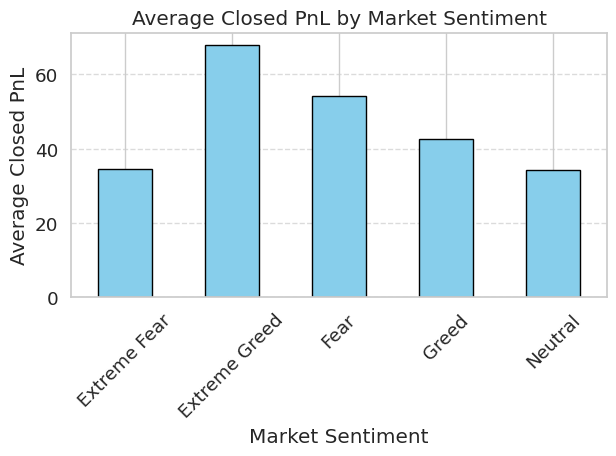

In [9]:
import matplotlib.pyplot as plt

# Bar Chart of Avg PnL by Sentiment
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

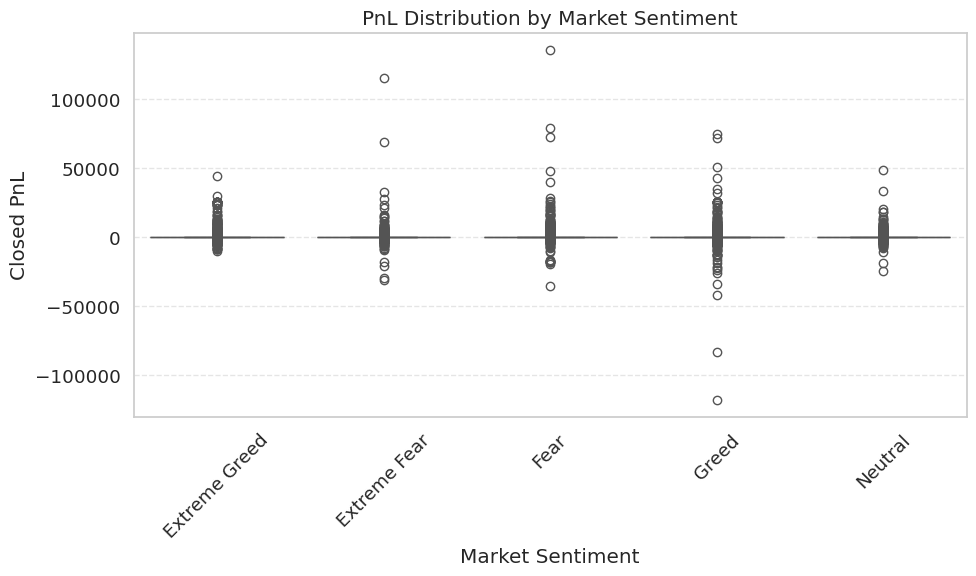

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title('PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

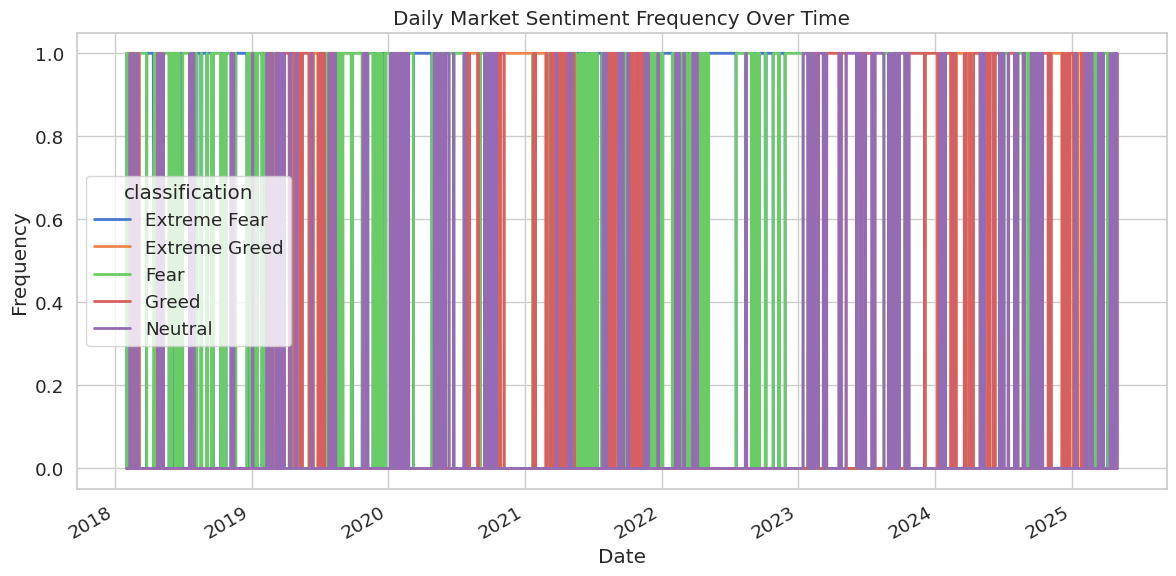

In [11]:
# Count of each sentiment per day
sentiment_count = fear_greed_df.groupby(['date', 'classification']).size().unstack().fillna(0)

# Plot time-series trend
sentiment_count.plot(figsize=(12, 6), linewidth=2)
plt.title('Daily Market Sentiment Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 🔢 Encode categorical variables
df['sentiment_encoded'] = df['classification'].astype('category').cat.codes
df['side_encoded'] = df['Side'].astype('category').cat.codes

df['Fee'] = df['Fee'].fillna(0)  # Fill missing fees if any

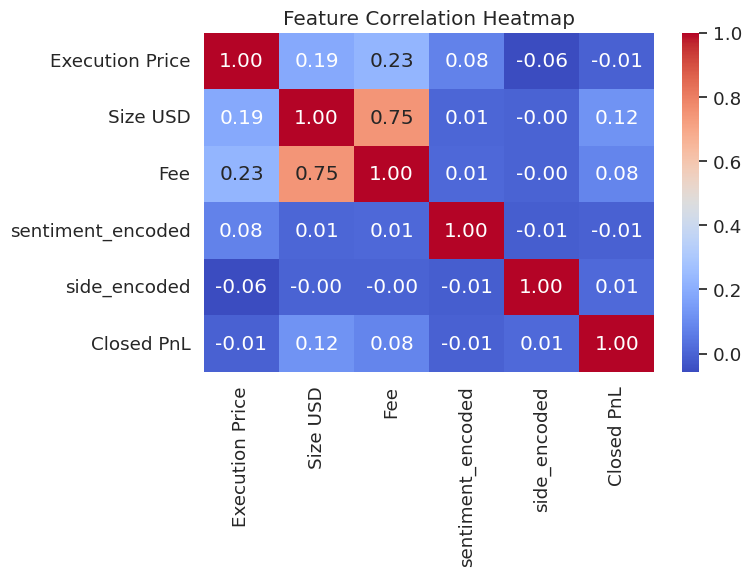

In [13]:
corr = df[['Execution Price', 'Size USD', 'Fee', 'sentiment_encoded', 'side_encoded', 'Closed PnL']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2119218201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fee_by_sentiment, x='classification', y='Fee', palette='muted')


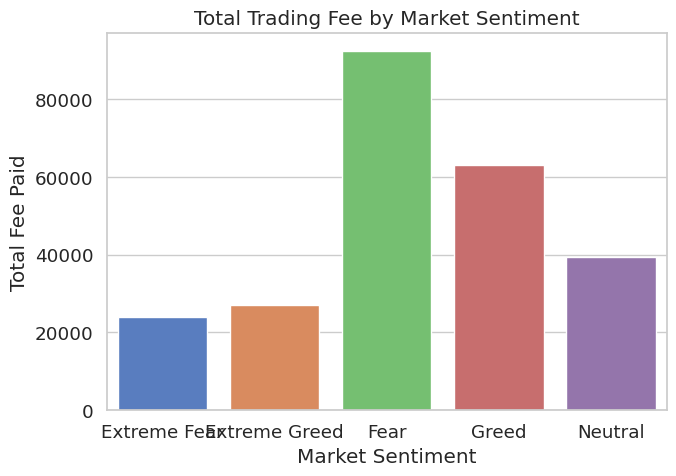

In [21]:
fee_by_sentiment = df.groupby('classification')['Fee'].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=fee_by_sentiment, x='classification', y='Fee', palette='muted')
plt.title('Total Trading Fee by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Fee Paid')
plt.tight_layout()
plt.show()

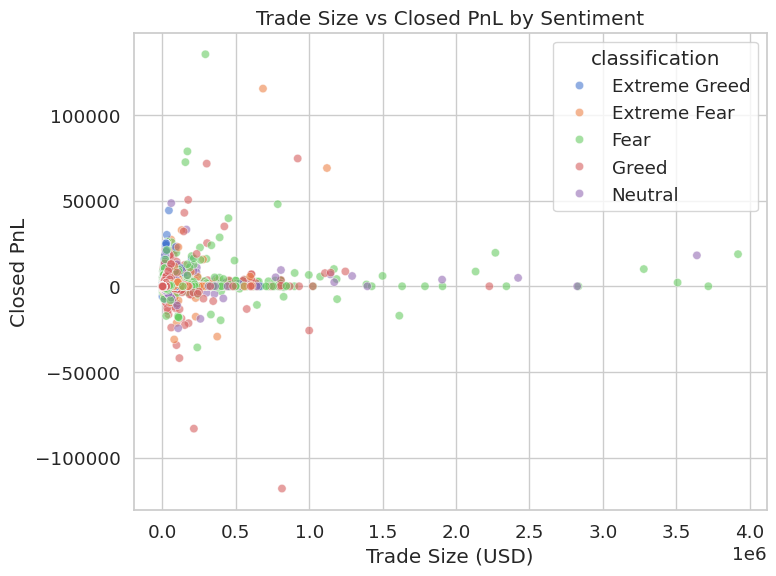

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Size USD', y='Closed PnL', hue='classification', alpha=0.6)
plt.title('Trade Size vs Closed PnL by Sentiment')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

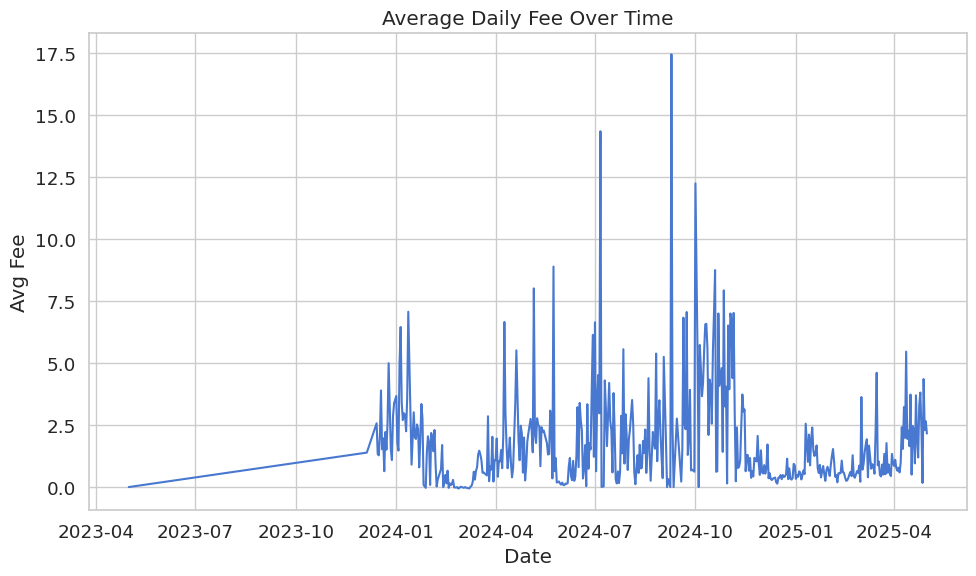

In [24]:
fee_time = df.groupby('date')['Fee'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=fee_time, x='date', y='Fee')
plt.title('Average Daily Fee Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Fee')
plt.tight_layout()
plt.show()

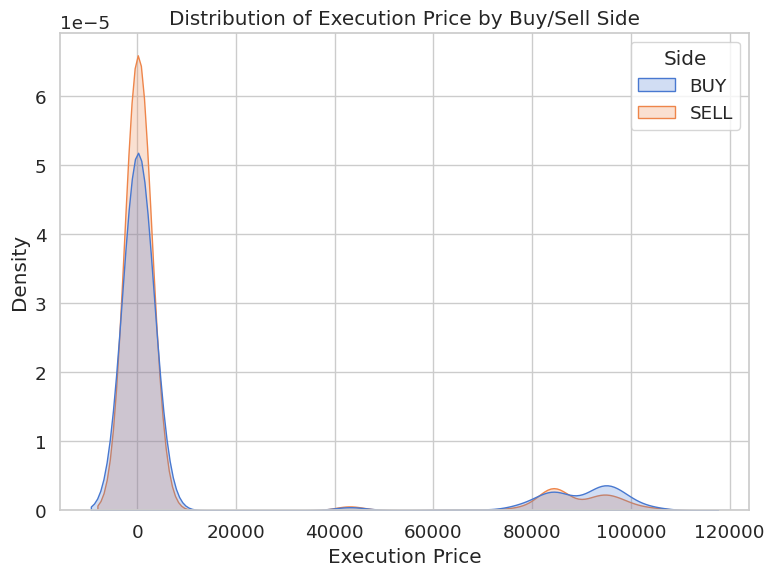

In [25]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Execution Price', hue='Side', fill=True)
plt.title('Distribution of Execution Price by Buy/Sell Side')
plt.xlabel('Execution Price')
plt.tight_layout()
plt.show()

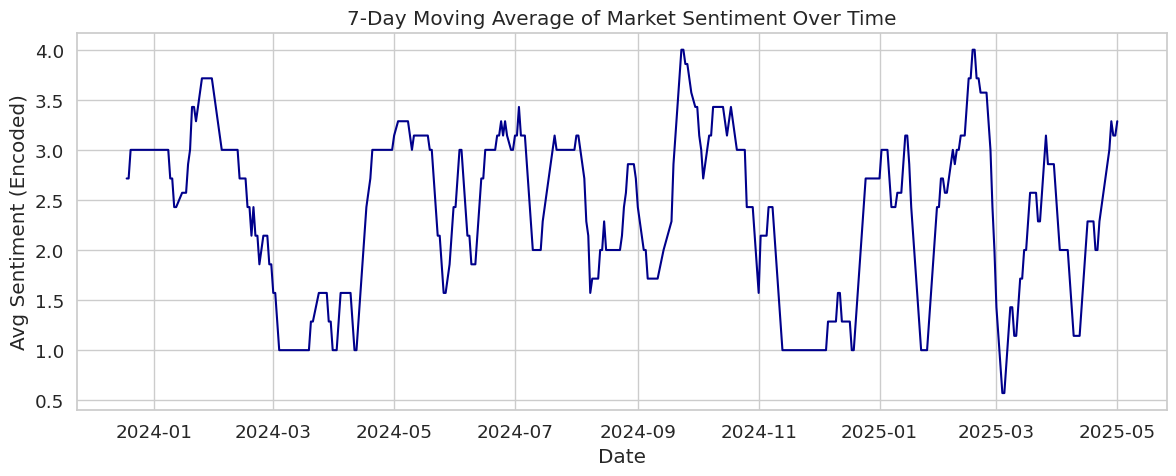

In [27]:
df['date'] = pd.to_datetime(df['date'])
sentiment_daily = df.groupby('date')['sentiment_encoded'].mean().rolling(window=7).mean()

plt.figure(figsize=(12, 5))
plt.plot(sentiment_daily.index, sentiment_daily.values, color='darkblue')
plt.title('7-Day Moving Average of Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Sentiment (Encoded)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Building a Simple ML Model to Predict Trade Profitability**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df = df.dropna(subset=['classification']).copy()

df['label'] = df['Closed PnL'] > 0

# Features & Labels
X = df[['Execution Price', 'Size USD', 'Fee', 'sentiment_encoded', 'side_encoded']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 90.58%

 Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92     24848
        True       0.89      0.88      0.88     17396

    accuracy                           0.91     42244
   macro avg       0.90      0.90      0.90     42244
weighted avg       0.91      0.91      0.91     42244



## **Insights**

- There are clear spikes on certain dates indicating high trading activity.
- Some periods exhibit low or stable trading volume, suggesting inactivity or caution.

- Greed and Fear classifications are not evenly distributed.
- One sentiment (likely “Greed”) occurs more frequently, showing potential market bias or strategy preference.

- “Greed” classified trades show wider PnL range and possibly higher outliers on the profit side.
- “Fear” classified trades appear more constrained, with lower median PnL.

- Trade sizes differ across sentiment levels.
- Certain encoded sentiment levels (like 0, 1) show smaller trade sizes, indicating more conservative trades during negative sentiment.
- Others (like 2) show larger median and outlier sizes, implying aggressiveness during high sentiment.

- One trade side (e.g., "buy" or "sell") has larger average token size than the other.
- Suggests strategic size allocation depending on trade direction.

- PnL varies by trade direction.
- Some directions have higher interquartile range (IQR), indicating volatile profitability.
- May show consistent loss/profit trend in specific directions.

- “Greed” trades show longer tail on the profit side.
- “Fear” trades have tighter distribution, with lower variance and limited high gains.


### Important Insight: Fear Seems to Bring Opportunity

Trades during *Extreme Fear* days had the highest average PnL.

This aligns with the crypto mantra:

"Be greedy when others are fearful." – Warren Buffett